# $Ceol$ $Rince$ $na$ $hÉireann$
## The Ceol Rince na hÉireann (CRÉ) corpus contains 1,224 Irish traditional dance tunes, each represented as a monophonic MIDI file.

Originally collected and published by [Breandán Breathnach][2] (1912-1985); transcribed to ABC Notation by [Bill Black][1]; corpus cleaned, annotated and converted to MIDI by Danny Diamond for Polifonia deliverable D3.1: Software Tools for Pattern Extraction.

This notebook explores the corpus, generating and visualizing some basic statistics on the content, including:
* Number of melodies in corpus.
* Distribution of key signature and time signature values across the corpus.
* Number of note events and number of bars per melody across the corpus.

[1]: http://www.capeirish.com/webabc
[2]: https://en.wikipedia.org/wiki/Breandán_Breathnach

## Prerequisites:

By default basepath is `./corpus`. In `<basepath>/abc` we should have a single file holding a corpus of monophonic folk
tunes in ABC Notation.

If the corpus is elsewhere, or if running on external data, change basepath below.

We will be writing outputs to subdirectories of basepath:<br>
`/MIDI`<br>
`/feat_seq_corpus`<br>
`/pattern_corpus`<br>
`/results`

Preprocessing: using abc_ingest.py script, each tune in the ABC corpus is converted to an individual MIDI file.
These MIDI files are stored at `<basepath>/MIDI`.

In [1]:
%cd "../"
%run abc_ingest
%cd "./corpus"



/Users/dannydiamond/NUIG/Polifonia/repo/folk_ngram_analysis/folk_ngram_analysis
Running abc2MIDI command-line tool...
exit status: 0
/Users/dannydiamond/NUIG/Polifonia/repo/folk_ngram_analysis/folk_ngram_analysis/corpus


'/Users/dannydiamond/NUIG/Polifonia/repo/folk_ngram_analysis/folk_ngram_analysis/corpus'

Setup paths; import os, music21, and numpy:


In [2]:
import os
import music21
import numpy as np

basepath = "./"
inpath = basepath + "/MIDI"
roots_path = basepath + "/roots.csv"

for path in [basepath, inpath, roots_path]:
    assert os.path.exists(path)



Import local corpus setup / analysis tools:

In [28]:
from corpus_processing_tools import Corpus

Initialize Corpus class. This will read all tunes from the MIDI corpus to music21 $stream$ format:

In [29]:
cre_corpus = Corpus(inpath)

Reading corpus MIDI files to Music21 streams: 100%|██████████| 1196/1196 [00:24<00:00, 48.51it/s] 


Extract root note for each tune in corpus:

In [33]:
root_vals = []

for tune in cre_corpus.tunes:
    # Parse score for music21 Key objects and list their tonic (i.e.: root) note names:
    roots = [key.tonic.name.upper() for key in tune.score.recurse().getElementsByClass(music21.key.Key)]
    # Retain first root note name from list above, or set root to NaN if MIDI file does not contain any root data.
    root = roots[0] if roots != [] else np.NaN
    root_vals.append(root)

roots = dict(zip(cre_corpus.titles, root_vals))
res = list(roots.items())

for k, v in res[:10]:
    print(f"{k}: {v}")
print("...")



McGovernsFavoritereel: A
CrushingtheTwigsreel: D
BillHartesReel: A
SecondHandCarreelThe: D
BoysoftheLakereelThe: G
MusicalPriestreelThe: B
WalloptheSpot: D
TommyODeasreel: G
FinnegansWidowpolka: G
GirlwiththeYellowHairThe: G
...


Occurrences of root notes across the corpus as percentages:

In [45]:
from collections import Counter
roots_histogram = dict(Counter(root_vals).most_common())
for root, count in roots_histogram.items():
    print(f"{root}: {round(count / 1195 * 100, 2)}%")

G: 40.59%
D: 34.9%
A: 13.05%
E: 9.37%
C: 1.67%
B: 0.33%
F: 0.08%


Chart illustrating occurrences of each root note across the corpus:

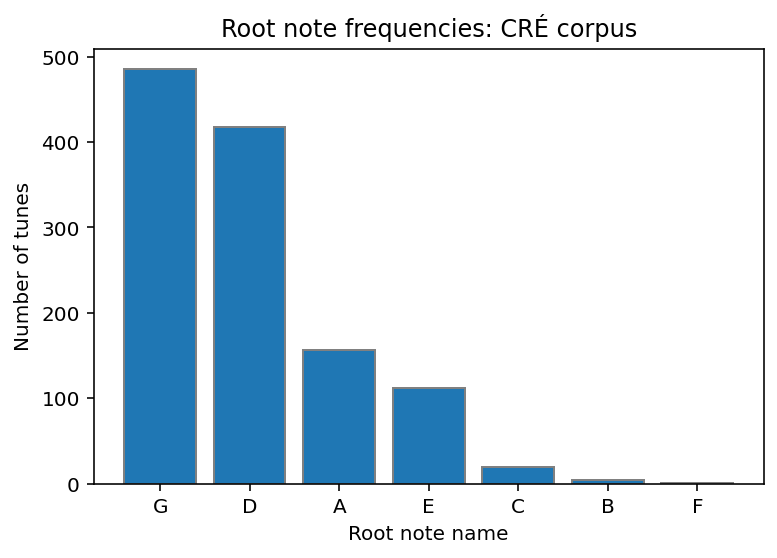

In [46]:
import matplotlib.pyplot as plt

plt.bar(list(roots_histogram.keys()), list(roots_histogram.values()), edgecolor='gray', linewidth=1)
plt.title('Root note frequencies: CRÉ corpus')
plt.xlabel('Root note name')
plt.ylabel('Number of tunes')
plt.show()

Extract time signature for each note in corpus:

In [42]:
time_sigs_lst = []

for tune in cre_corpus.tunes:
    # Parse score for music21 Time Sig objects:
    time_sigs = [ts for ts in tune.score.recurse().getElementsByClass(music21.meter.TimeSignature)]
    # Retain first Time Sig for each tune, or set to NaN if MIDI file does not contain any Time Sig data.
    time_sig = time_sigs[0].ratioString if time_sigs != [] else ''
    time_sigs_lst.append(time_sig)

time_sigs_dict = dict(zip(cre_corpus.titles, time_sigs_lst))
res = list(time_sigs_dict.items())

for k, v in res[:10]:
    print(f"{k}: {v}")
print("...")

McGovernsFavoritereel: 4/4
CrushingtheTwigsreel: 4/4
BillHartesReel: 4/4
SecondHandCarreelThe: 4/4
BoysoftheLakereelThe: 4/4
MusicalPriestreelThe: 4/4
WalloptheSpot: 6/8
TommyODeasreel: 4/4
FinnegansWidowpolka: 2/4
GirlwiththeYellowHairThe: 9/8
...


Occurrences of time signatures across the corpus as percentages:

In [44]:
time_sigs_histogram = dict(Counter(time_sigs_lst).most_common())
for ts, count in time_sigs_histogram.items():
    print(f"{ts}: {round(count / 1195 * 100, 2)}%")

4/4: 59.5%
6/8: 21.51%
2/4: 7.03%
12/8: 6.61%
9/8: 4.18%
2/2: 1.09%
6/4: 0.08%


Chart illustrating occurrences of each time signature across the corpus:

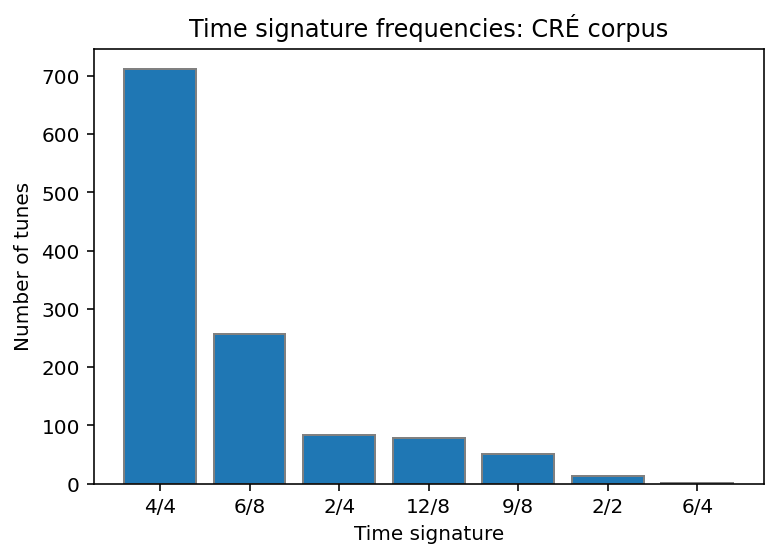

In [47]:
plt.bar(list(time_sigs_histogram.keys()), list(time_sigs_histogram.values()), edgecolor='gray', linewidth=1)
plt.title('Time signature frequencies: CRÉ corpus')
plt.xlabel('Time signature')
plt.ylabel('Number of tunes')
plt.show()

Convert corpus to feature sequence format for further analysis:

In [48]:
cre_corpus.filter_empty_scores()
cre_corpus.calculate_feat_seqs()
cre_corpus.calc_pitch_class_seqs()
cre_corpus.calc_intervals()

Calculating feature sequences from music21 scores: 100%|██████████| 1195/1195 [00:04<00:00, 251.63it/s]
Calculating interval sequences: 100%|██████████| 1195/1195 [00:00<00:00, 1319.85it/s]


Print sample feature sequence data table for a single tune:

In [49]:
print(f"Primary feature sequence data for {cre_corpus.tunes[0].title}:")
print(cre_corpus.tunes[0].feat_seq.head())

Primary feature sequence data for McGovernsFavoritereel:
   midi_note  onset  duration  velocity  pitch_class  interval
0         69      0         3       105            9         0
1         69      4         1        95            9         0
2         67      5         1        80            7        -2
3         64      6         1        80            4        -3
4         62      7         1        80            2        -2


Calculate distribution of tune lengths across the corpus, as measured by number of note events per tune.

In [50]:
tune_lengths = [len(tune.feat_seq) for tune in cre_corpus.tunes]
tune_length_histogram = dict(Counter(tune_lengths).most_common())

Display tune length distribution as bar chart:

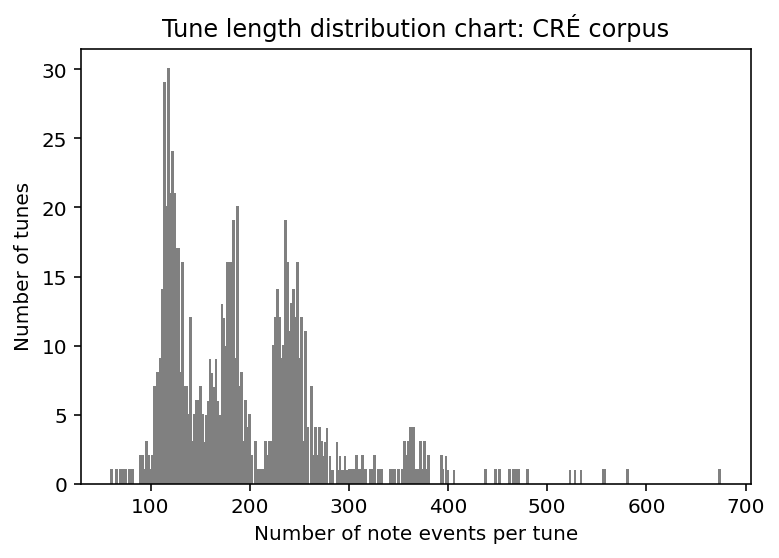

In [51]:
plt.bar(list(tune_length_histogram.keys()), list(tune_length_histogram.values()), edgecolor='gray', linewidth=1)

plt.title('Tune length distribution chart: CRÉ corpus')
plt.xlabel('Number of note events per tune')
plt.ylabel('Number of tunes')
plt.show()

Calculate number of bars per tune across the corpus:

In [52]:
import utils

filtered_seqs = [utils.filter_dataframe(tune.feat_seq, seq='velocity', threshold=100) for tune in cre_corpus.tunes]
bar_counts = [len(seq) for seq in filtered_seqs]
bar_count_histogram = dict(Counter(bar_counts).most_common())

Display number of bars per tune as histogram:

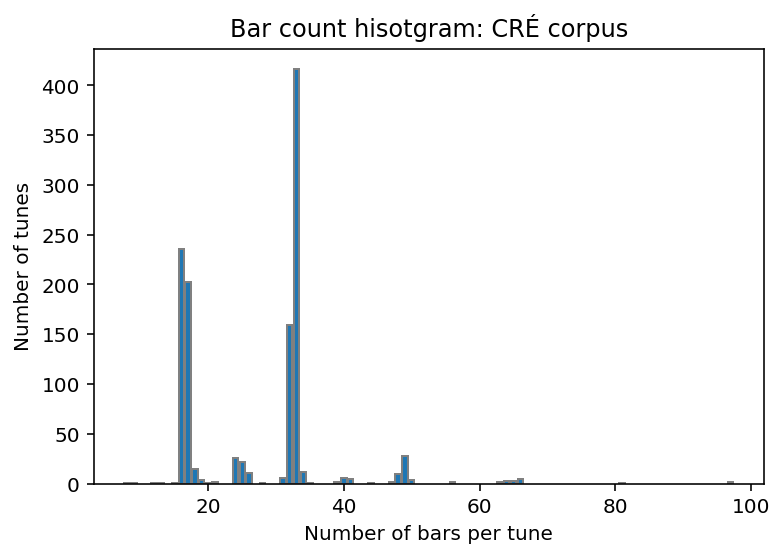

In [53]:
plt.bar(list(bar_count_histogram.keys()), list(bar_count_histogram.values()), edgecolor='gray', linewidth=1)

plt.title('Bar count hisotgram: CRÉ corpus')
plt.xlabel('Number of bars per tune')
plt.ylabel('Number of tunes')
plt.show()